In [161]:
import numpy as np
import numba
from timeit import timeit
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [162]:
@numba.njit
def slow_matvec_n(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0 #have to set values to booleans when using number as number wont allow switch between
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

NameError: name 'njit' is not defined

In [26]:
# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(matrix @ vector)

[0.18470408 0.64945351 1.0389346 ]
[0.18470408 0.64945351 1.0389346 ]


# Function Storage

In [163]:
def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0 #have to set values to booleans when using number as number wont allow switch between
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

In [164]:
@numba.njit
def faster_matvec(matrix, vector):
    """Faster matrix produuct from the previous week"""
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = np.dot(matrix[r],vector)
        result.append(value)
    return np.array(result)

In [172]:
@numba.njit(parallel=True)  #['float64[:,:](float64[:,:], float64[:,:])'],
def faster_matvec_p(matrix, vector):
    """Faster matrix produuct from the previous week"""
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in numba.prange(matrix.shape[0]):
        value = np.dot(matrix[r],vector)
        result.append(value)
    return np.array(result)

In [166]:
@numba.jit
def faster_matvec_jit(matrix, vector):
    """Faster matrix produuct from the previous week"""
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = np.dot(matrix[r],vector)
        result.append(value)
    return np.array(result)

In [167]:
@numba.njit
def slow_matvec_n(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0 #have to set values to booleans when using number as number wont allow switch between
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

In [180]:
n = 10 #number of iterations
size = 10 #size of matrix and vector

#storage arrays
it_array = np.arange(n)
numba_times = np.zeros(n)
numba_times_f = np.zeros(n)
times = np.zeros(n)



#storing processing times for each 
for i in range(n):
    matrix = np.random.rand(size, size)
    vector = np.random.rand(size)
    times[i] = timeit('slow_matvec(matrix, vector)', setup = 'from __main__ import slow_matvec, matrix, vector'
                       ,number=1)
    numba_times[i] = timeit('slow_matvec_n(matrix, vector)', setup = 'from __main__ import slow_matvec_n, matrix, vector'
                       ,number=1)
    numba_times_f[i] = timeit('faster_matvec(matrix, vector)', setup = 'from __main__ import faster_matvec, matrix, vector'
                       ,number=1)

Text(0.5, 1.0, 'hi')

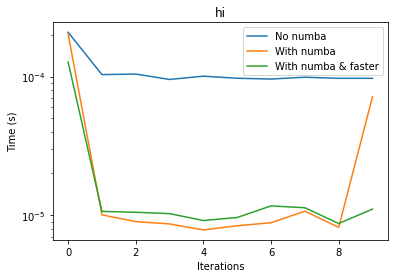

In [181]:
#plotting results
plt.plot(it_array, times, label='No numba')
plt.plot(it_array, numba_times, label='With numba')
plt.plot(it_array, numba_times_f, label='With numba & faster')
plt.yscale('log')
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.legend()
plt.title('hi')

In [177]:
n = 10 #number of iterations
sizes = np.array([3,5,10,20,30,50,100,200,500,750,1000]) #size of matrix and vector
num_its = 100  #number of timing iterations

#storage arrays
variables = 7
times = np.zeros((variables, len(sizes)))

#run the numba functions initially
matrix = np.random.rand(sizes[0], sizes[0])
vector = np.random.rand(sizes[0])
numba_times_init = timeit(lambda: slow_matvec_n(matrix, vector), number=num_its)
numba_times_f_init = timeit(lambda: faster_matvec(matrix, vector), number=num_its)


#times[i] = timeit('slow_matvec(matrix, vector)',number=num_its,globals=globals())

#storing processing times for each different size array
for i, size in enumerate(sizes):
    matrix = np.random.rand(size, size)
    vector = np.random.rand(size)
    times[0,i] = timeit(lambda: slow_matvec(matrix, vector), number=num_its)
    times[1,i] = timeit(lambda: slow_matvec_n(matrix, vector), number=num_its)
    times[2,i] = timeit(lambda: faster_matvec(matrix, vector), number=num_its)
    times[3,i] = timeit(lambda: faster_matvec_jit(matrix, vector), number=num_its)
    times[4,i] = timeit(lambda: faster_matvec_p(matrix, vector), number=num_its)
    times[5,i] = timeit(lambda: matrix@vector,number=num_its)
    
    #storing matrix in contiguous array to see time diff
    matrix = np.ascontiguousarray(matrix)
    vector = np.ascontiguousarray(vector)
    times[6,i] = timeit(lambda: faster_matvec(matrix, vector), number=num_its)

Initial slow numba time: 0.0003425170016271295
Init fast numba time: 0.0002925590015365742


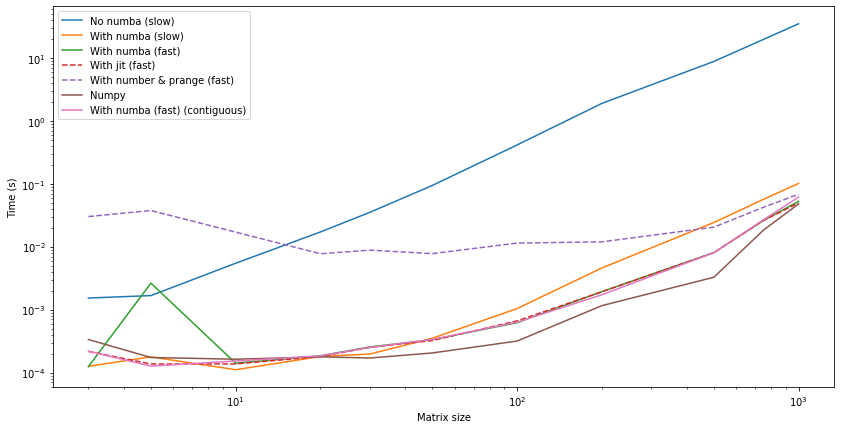

In [178]:
#printing initial load times
print('Initial slow numba time:', numba_times_init)
print('Init fast numba time:', numba_times_f_init)


#plotting results
plt.figure(figsize=(14,7))
plt.plot(sizes, times[0,:], label='No numba (slow)')
plt.plot(sizes, times[1,:], label='With numba (slow)')
plt.plot(sizes, times[2,:], label='With numba (fast)')
plt.plot(sizes, times[3,:], label='With jit (fast)', linestyle='--')
plt.plot(sizes, times[4,:], label='With number & prange (fast)', linestyle='--')
plt.plot(sizes, times[5,:], label='Numpy', linestyle='-')
plt.plot(sizes, times[6,:], label='With numba (fast) (contiguous)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time (s)')
plt.xlabel('Matrix size')
plt.legend()